In [2]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

In [3]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [5]:
df.shape

(4000, 14)

In [41]:
df.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,sTime
3995,2024-01-31 10:00:00+00:00,19694,1.08226,1.08630,1.08214,1.08576,1.08219,1.08623,1.08206,1.08569,1.08234,1.08637,1.08221,1.08584,s24-01-31 10:00
3996,2024-01-31 14:00:00+00:00,32671,1.08576,1.08876,1.08420,1.08498,1.08568,1.08868,1.08412,1.08491,1.08585,1.08883,1.08427,1.08505,s24-01-31 14:00
3997,2024-01-31 18:00:00+00:00,45447,1.08497,1.08644,1.07950,1.08176,1.08490,1.08636,1.07942,1.08168,1.08504,1.08652,1.07957,1.08183,s24-01-31 18:00
3998,2024-01-31 22:00:00+00:00,8564,1.08172,1.08204,1.08020,1.08090,1.08159,1.08194,1.08012,1.08082,1.08185,1.08214,1.08027,1.08098,s24-01-31 22:00
3999,2024-02-01 02:00:00+00:00,9291,1.08087,1.08220,1.08027,1.08028,1.08079,1.08212,1.08019,1.08020,1.08095,1.08227,1.08034,1.08035,s24-02-01 02:00


In [40]:
df['sTime'] = [dt.datetime.strftime(x,"s%y-%m-%d %H:%M") for x in df.time] # we are doing this to remove weekend gaps from the graph

In [43]:
df_plot = df.iloc[:100]

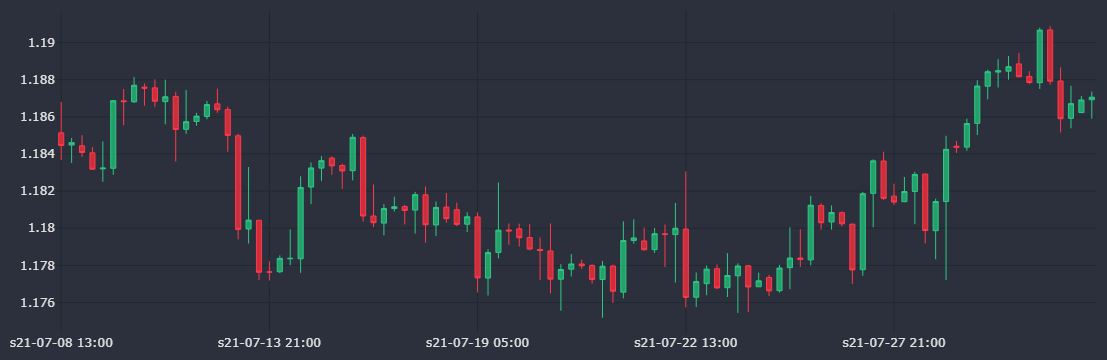

In [45]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x = df_plot.sTime,
    open = df_plot.mid_o,
    high = df_plot.mid_h,
    low = df_plot.mid_l,
    close = df_plot.mid_c,
    line = dict(width=1),
    opacity = 1,
    increasing_fillcolor = "#24a06b",
    decreasing_fillcolor = "#cc2e3c",
    increasing_line_color = "#2ec886",
    decreasing_line_color = "#ff3a4c",
))

fig.update_yaxes(
    gridcolor = "#1f292f"
)

fig.update_xaxes(
    gridcolor = "#1f292f",
    rangeslider = dict(visible=False),
    nticks=5,
)

fig.update_layout(
    height = 400,
    margin = dict(l=10,r=10,t=10,b=10),
    paper_bgcolor = "#2c303c",
    plot_bgcolor = "#2c303c",
    font = dict(color="#e1e1e1")
)

fig.show()